In [ ]:
#  ast: abstrast syntax tree
import ast
import dis
from IPython.display import Image, display_png
from graphviz import Digraph

In [ ]:
def visit(node, nodes, pindex, g):
  name = str(type(node).__name__)
  index = len(nodes)
  nodes.append(index)
  g.node(str(index), name)
  if index != pindex:
    g.edge(str(pindex), str(index))
  for n in ast.iter_child_nodes(node):
    visit(n, nodes, index, g)

In [ ]:
def show_ast(src):
  graph = Digraph(format="png")
  tree = ast.parse(src)
  visit(tree, [], 0, graph)
  graph.render("test")
  display_png(Image("test.png"))

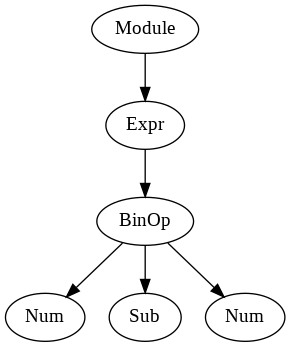

In [ ]:
src = """
3-4
"""
show_ast(src)

In [ ]:
a, b = (1,2)

In [ ]:
def func(a,b):
  return a+b

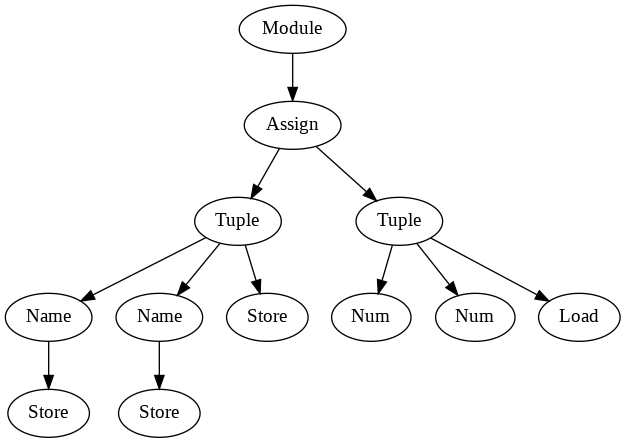

In [ ]:
src = """
a, b = (1,2)
"""
show_ast(src)

In [ ]:
dis.dis("a + b")

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 BINARY_ADD
              6 RETURN_VALUE


In [ ]:
dis.dis("a + b + c")

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 BINARY_ADD
              6 LOAD_NAME                2 (c)
              8 BINARY_ADD
             10 RETURN_VALUE


In [ ]:
dis.dis("a + b * c")

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE
